# Homework 3


#### 1. Lecture 3의 중심극한정리 부분에서 지수분포(exponential distribution)을 사용하였다. 지수분포는 아래와 같은 확률밀도함수를 갖는다. 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5a9fdb86104f54ca275a0c340c25d88afff540ae">

#### Lecture 3에서는 $\lambda=1$(default; exp(1))를 사용하였고 이 때 지수분포를 따르는 확률변수의 기대값과 분산은 1로 알려져있다. 

#### (a) 아래의 과정에 따라 표본을 추출하여 저장하시오. 
- exp(1)에서 100000개의 무작위표본을 추출하여  `pop`의 이름으로 저장하시오. 
- exp(1)에서 30개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하여 `sample_mean1`으로 저장하시오.
- exp(1)에서 100개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하여  `sample_mean2`로 저장하시오

In [12]:
# import common
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt


In [26]:
np.random.seed(seed=0)
# 지수분포는 기하분포의 x 표본추출량이 무한대로 갈때 생가는 분포의 모양
# 람다 = 1 수식의 속도매개변수 람다가 1이며 지수분포란 '사건이 서로 독립적일 때 다음 사건이 일어날 때까지 대기시간'이다.
# 확률변수의 기대값 np = 1, 분산 np(p-1) = 1이므로 100000개의 무작위 표본을 뽑는경우 코드는 다음과 같다
rep = 100000
pop = stats.expon.rvs(size = rep) # expon은 지수 연속확률 변수

In [14]:
# 30개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하는 코드는 다음과 같다.


In [19]:
n1=30
rep1=1000
xsample1 = stats.expon.rvs(size=n1*rep1)
xsample1 = np.reshape(xsample1, [n1,rep1])
sample_mean1 = xsample1.mean(axis=0)


In [32]:

xsample2 = stats.expon.rvs(size = rep*100)
xsample2 =np.reshape(xsample2, [100, rep])
sample_mean2 = xsample2.mean(axis=0)
sample_mean2

array([0.85041988, 0.95677424, 0.92148736, ..., 1.1044659 , 0.99412116,
       0.88087718])

#### (b) 위에서 저장한 `pop`, `sample_mean1`, `sample_mean2`의 히스토그램을 그려 저장하고 그 모양을 비교서술하시오. 

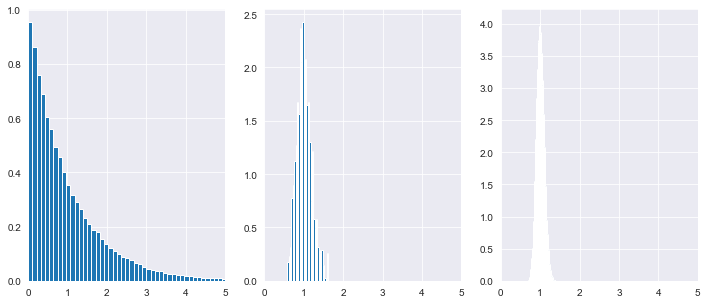

In [36]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 5))
ax = axes[0]
ax.hist(pop, bins=100, density=True)
ax.set_xlim(0, 5)
ax = axes[1]
ax.hist(sample_mean1, bins=30, density=True)
ax.set_xlim(0, 5)
ax = axes[2]
ax.hist(sample_mean2, bins=100, density=True)
ax.set_xlim(0, 5)
ax.set_position
plt.show()


#### (c) 이론적으로 계산했을 때 `pop`, `sample_mean1`, `sample_mean2`의 평균과 분산은 무엇이 될 것이라고 추측하는가?

1 입니다

#### (d)  `pop`, `sample_mean1`, `sample_mean2`의 평균과 분산을 계산하여 (c)에서 추측한 값과 가까운 값인지 확인하시오. 

ㅇㅇ

#### 2. 	개인이 지불하는 자동차 보험료의 연간 평균은 687달러이다. 이 값을 모집단 평균으로 하고 모집단의 표준편차가 230달러이다. 45개의 자동차 보험계약을 생각해보자. 45개 보험료의 평균이 모집단 평균의 +-25달러 이내에 있을 확률은 얼마인가?


In [42]:
mean = 687
std = 230
n = 45
se = std / np.sqrt(n)
stats.norm.cdf(mean+ 25, loc = mean, scale= se) - stats.norm.cdf(mean - 25, loc = mean, scale= se)

0.5340916787127394

#### 3\. 한 연구소는 가구의 17%가 식료품점에서 한 주에 10만원보다 많은 돈을 지출한다는 것을 보였다. 모집단에서 800가구를 무작위 표본으로 선정하였다고 가정하자. 

#### A. 식품점에서 주당 10만원보다 많은 돈을 지출하는 가구의 표본비율이 모집단 비율의 $\pm 0.02$이내에 있을 확률은 얼마인가? 

In [43]:

p = 0.17
p_se = np.sqrt(0.17*(1-0.17)/800)
stats.norm.cdf(0.17+0.02, loc = p, scale = p_se) - stats.norm.cdf(0.17-0.02, loc = p, scale = p_se)


0.867920817798008

In [ ]:
stats.norm.cdf()

#### B. 1600가구를 표본으로 하여 A 문항에 답하시오. 

In [44]:
p = 0.17
p_se = np.sqrt(0.17*(1-0.17)/1600)
stats.norm.cdf(0.17+0.02, loc = p, scale = p_se) - stats.norm.cdf(0.17-0.02, loc = p, scale = p_se)


0.966806871738479

#### 4. 한 조사에 따르면 한국 성인의 38%가 그들의 삶에 만족한다고 답하였다. 이 결과는 현재 모집단인 한국 성인에 대해 사실이라 가정하자. 1000명의 임의 표본에서 그들의 삶이 만족한다는 비율을 $\hat p$ 라고 하자.  $\hat p$이 0.40과 0.42 사이에 있을 확률을 계산하라 

In [0]:
p = 0.38
p_se = np.sqrt(0.38*(1-0.38)/1000)
stats.norm.cdf(0.42, loc = p, scale = p_se) - stats.norm.cdf(0.40, loc = p, scale = p_se)

In [48]:
a = stats.norm.cdf(0.42, p, p_se)